In [38]:
# Install the required libraries
!pip install prophet
!pip install gdown

In [39]:
# Import the required libraries and dependencies.
import pandas as pd
import datetime as dt
from prophet import Prophet
from matplotlib import pyplot as plt
from google.colab import files
import gdown;
url = 'https://drive.google.com/uc?id=1Xn0QmR6paT0pxeX7UEiwb_Y6NvP23N0Q'
output = 'Gold_Data.csv'
gdown.download(url, output, quiet=False)

%matplotlib inline

Downloading...
From: https://drive.google.com/uc?id=1Xn0QmR6paT0pxeX7UEiwb_Y6NvP23N0Q
To: /content/Gold_Data.csv
100%|██████████| 114k/114k [00:00<00:00, 4.77MB/s]


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Read csv file as DataFrame, with the first column as row index.

gold_df = pd.read_csv(output,
                 index_col="Date",
                 parse_dates=True
                )

# Drop any values that are blank.

gold_df = gold_df.dropna()

# Preview the dataset.

gold_df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-12-12,"2,748.30","2,753.51","2,760.91","2,743.49",1.62K,-0.30%
2024-12-11,"2,756.70","2,721.20","2,759.70","2,719.10",264.99K,1.41%
2024-12-10,"2,718.40","2,684.40","2,721.70","2,680.70",181.51K,1.21%
2024-12-09,"2,685.80","2,665.00","2,700.00","2,649.70",182.15K,0.99%
2024-12-06,"2,659.60","2,655.00","2,667.90","2,635.60",167.17K,0.42%


In [42]:
# Clean the columns of the data
gold_df.columns = ["Price", "Open", "High", "Low", "Volume", "Change %"]
gold_df =  gold_df.drop(columns="Volume")
gold_df.head()


,Price,Open,High,Low,Change %
Date,,,,,
2024-12-12,"2,748.30","2,753.51","2,760.91","2,743.49",-0.30%
2024-12-11,"2,756.70","2,721.20","2,759.70","2,719.10",1.41%
2024-12-10,"2,718.40","2,684.40","2,721.70","2,680.70",1.21%
2024-12-09,"2,685.80","2,665.00","2,700.00","2,649.70",0.99%
2024-12-06,"2,659.60","2,655.00","2,667.90","2,635.60",0.42%


In [43]:
# Convert the Price column to numeric and ignore the comma
gold_df['Price'] = gold_df['Price'].str.replace(',', '').astype(float)
gold_df['Open'] = gold_df['Open'].str.replace(',', '').astype(float)
gold_df['High'] = gold_df['High'].str.replace(',', '').astype(float)
gold_df['Low'] = gold_df['Low'].str.replace(',', '').astype(float)

In [44]:
gold_df.head()

,Price,Open,High,Low,Change %
Date,,,,,
2024-12-12,2748.3,2753.51,2760.91,2743.49,-0.30%
2024-12-11,2756.7,2721.20,2759.70,2719.10,1.41%
2024-12-10,2718.4,2684.40,2721.70,2680.70,1.21%
2024-12-09,2685.8,2665.00,2700.00,2649.70,0.99%
2024-12-06,2659.6,2655.00,2667.90,2635.60,0.42%


In [45]:
# Reset the index so that we recode the columns for Prophet
gold_df.reset_index(inplace=True)

In [46]:
# Create a DataFrame for Bitcoin to include the Date and Price columns only
prophet_gold_df = gold_df[["Date", "Price"]]

# Rename the columns to the Prophet model syntax
prophet_gold_df.columns = ["ds", "y"]

# Preview the dataset
prophet_gold_df.head()


,ds,y
0,2024-12-12,2748.3
1,2024-12-11,2756.7
2,2024-12-10,2718.4
3,2024-12-09,2685.8
4,2024-12-06,2659.6


In [47]:
# Call the Prophet function, store as an object
m = Prophet()
m

In [48]:
# Fit the time-series model.
m.fit(prophet_gold_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplslkqv6s/fx793ozm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplslkqv6s/2x3apfnl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1255', 'data', 'file=/tmp/tmplslkqv6s/fx793ozm.json', 'init=/tmp/tmplslkqv6s/2x3apfnl.json', 'output', 'file=/tmp/tmplslkqv6s/prophet_modelelij627n/prophet_model-20241213055424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:54:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:54:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as approx 385 days
future_gold_trends = m.make_future_dataframe(periods=385, freq='D')

# View the last five rows of the future_bitcoin_trends DataFrame
display(future_gold_trends.tail(5))

,ds
1913,2025-12-28
1914,2025-12-29
1915,2025-12-30
1916,2025-12-31
1917,2026-01-01


In [50]:
# Make the predictions for the trend data using the future_bitcoin_trends DataFrame
forecast_gold_trends = m.predict(future_gold_trends)

# Display the first five rows of the forecast_bitcoin_trends DataFrame
display(forecast_gold_trends.tail(10))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1908,2025-12-23,3453.854985,2889.226062,4003.306328,2901.453711,4021.640310,-3.577164,-3.577164,-3.577164,6.967549,6.967549,6.967549,-10.544713,-10.544713,-10.544713,0.0,0.0,0.0,3450.277821
1909,2025-12-24,3455.764628,2892.450147,4023.989610,2901.038000,4023.754845,-3.206123,-3.206123,-3.206123,6.903938,6.903938,6.903938,-10.110061,-10.110061,-10.110061,0.0,0.0,0.0,3452.558505
1910,2025-12-25,3457.674271,2896.716202,4019.850483,2902.040743,4025.869381,-2.134849,-2.134849,-2.134849,7.682202,7.682202,7.682202,-9.817052,-9.817052,-9.817052,0.0,0.0,0.0,3455.539422
1911,2025-12-26,3459.583914,2898.462335,4021.125843,2903.043487,4029.490080,-1.819521,-1.819521,-1.819521,7.843374,7.843374,7.843374,-9.662896,-9.662896,-9.662896,0.0,0.0,0.0,3457.764393
1912,2025-12-27,3461.493557,2878.418171,4002.254792,2903.792770,4034.178999,-26.830374,-26.830374,-26.830374,-17.188521,-17.188521,-17.188521,-9.641853,-9.641853,-9.641853,0.0,0.0,0.0,3434.663183
1913,2025-12-28,3463.403200,2874.383521,4020.204027,2904.477396,4038.820370,-26.933986,-26.933986,-26.933986,-17.188509,-17.188509,-17.188509,-9.745476,-9.745476,-9.745476,0.0,0.0,0.0,3436.469215
1914,2025-12-29,3465.312843,2898.732810,4036.241722,2903.681437,4043.455453,-4.982957,-4.982957,-4.982957,4.979967,4.979967,4.979967,-9.962924,-9.962924,-9.962924,0.0,0.0,0.0,3460.329886
1915,2025-12-30,3467.222486,2895.483402,4046.898099,2902.679991,4048.090537,-3.313783,-3.313783,-3.313783,6.967549,6.967549,6.967549,-10.281332,-10.281332,-10.281332,0.0,0.0,0.0,3463.908703
1916,2025-12-31,3469.132129,2898.612993,4062.516281,2901.678545,4052.725620,-3.782303,-3.782303,-3.782303,6.903938,6.903938,6.903938,-10.686241,-10.686241,-10.686241,0.0,0.0,0.0,3465.349826
1917,2026-01-01,3471.041772,2895.712774,4040.459821,2900.677099,4057.360704,-3.479858,-3.479858,-3.479858,7.682202,7.682202,7.682202,-11.162060,-11.162060,-11.162060,0.0,0.0,0.0,3467.561914


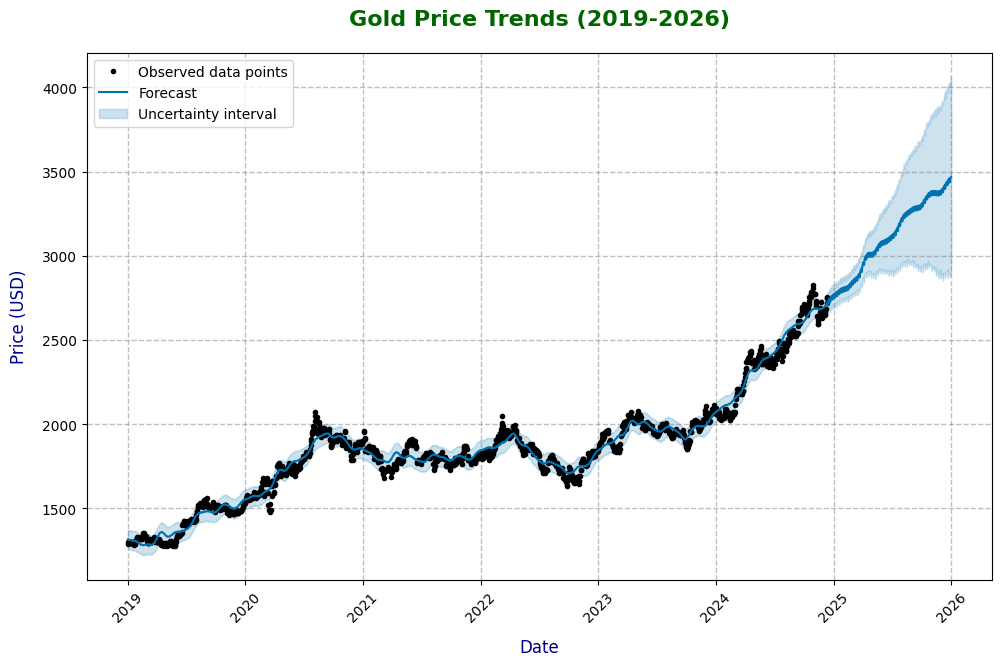

In [51]:
# From the forecast_bitcoin_trends DataFrame, plot the data to visualize
m.plot(forecast_gold_trends)

plt.xlabel("Date", fontsize=12, labelpad=10, color='darkblue')  # Label font and spacing
plt.ylabel("Price (USD)", fontsize=12, labelpad=10, color='darkblue')  # Label font and spacing
plt.title("Gold Price Trends (2019-2026)", fontsize=16, fontweight='bold', color='darkgreen', pad=20)  # Bold and larger title

# Formatting x-axis for better readability
plt.xticks(rotation=45, fontsize=10)  # Rotate x-ticks

# Grid and legend
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid with light styling
plt.legend(loc='upper left', fontsize=10)  # Add legend

plt.show()


In [52]:
# Save the forecast dataframe to a csv
forecast_gold_trends.to_csv("/content/forecast_gold_trends.csv")
files.download("forecast_gold_trends.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
gold_df['Stock Volatility'] = gold_df['Price'].rolling(window=4).std()
gold_df.head()

,Date,Price,Open,High,Low,Change %,Stock Volatility
0,2024-12-12,2748.3,2753.51,2760.91,2743.49,-0.30%,NaN
1,2024-12-11,2756.7,2721.20,2759.70,2719.10,1.41%,NaN
2,2024-12-10,2718.4,2684.40,2721.70,2680.70,1.21%,NaN
3,2024-12-09,2685.8,2665.00,2700.00,2649.70,0.99%,32.180843
4,2024-12-06,2659.6,2655.00,2667.90,2635.60,0.42%,41.961043


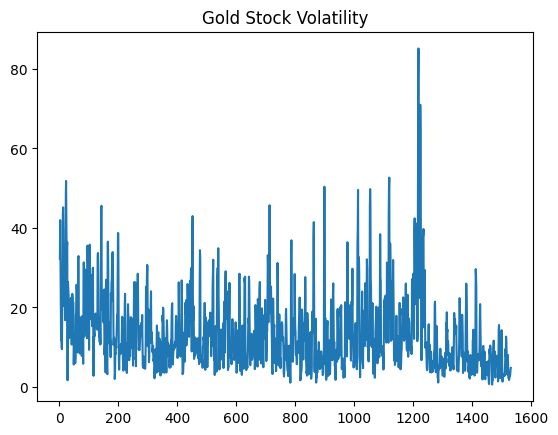

In [54]:
# Visualize the stock volatility
gold_df['Stock Volatility'].plot(title="Gold Stock Volatility");

In [55]:
# Export new dataframe for bitcoin_analysis_dataframe

gold_df.to_csv("/content/gold_analysis_dataframe.csv")
files.download("/content/gold_analysis_dataframe.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>